In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dat = pd.read_csv('total_100.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
total_inc_data = dat[dat.vartype == "Xsi1"]
total_inc_data['value'] = total_inc_data['value'].astype(float)
total_inc_data['t'] = total_inc_data['t'].astype(int)
window = 720
total_inc_data['roll'] = ((total_inc_data["t"])/window)
total_inc_data['roll'] = total_inc_data['roll'].astype(int)
total_inc_data = total_inc_data.groupby(["vartype","roll"]).sum()
print(total_inc_data)

/tmp/ipykernel_25229/152547560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_inc_data['value'] = total_inc_data['value'].astype(float)
/tmp/ipykernel_25229/152547560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_inc_data['t'] = total_inc_data['t'].astype(int)
/tmp/ipykernel_25229/152547560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

                       t         value
vartype roll                          
Xsi1    0      110007000  4.745576e+09
        1      330327000  3.497215e+09
        2      550647000  3.353582e+09
        3      738501732  3.107621e+09
        4      793029600  2.441032e+09
        5      969285600  2.309223e+09
        6     1145541600  2.179747e+09
        7     1321797600  2.049265e+09
        8     1498053600  1.922646e+09
        9     1674309600  1.804643e+09
        10     246483000  1.205171e+08


In [14]:
total_inc_data['infec_logs'] = np.log10(total_inc_data['value'])
print(total_inc_data)

                       t         value  infec_logs
vartype roll                                      
Xsi1    0      110007000  4.745576e+09    9.676289
        1      330327000  3.497215e+09    9.543722
        2      550647000  3.353582e+09    9.525509
        3      738501732  3.107621e+09    9.492428
        4      793029600  2.441032e+09    9.387573
        5      969285600  2.309223e+09    9.363466
        6     1145541600  2.179747e+09    9.338406
        7     1321797600  2.049265e+09    9.311598
        8     1498053600  1.922646e+09    9.283899
        9     1674309600  1.804643e+09    9.256391
        10     246483000  1.205171e+08    8.081049


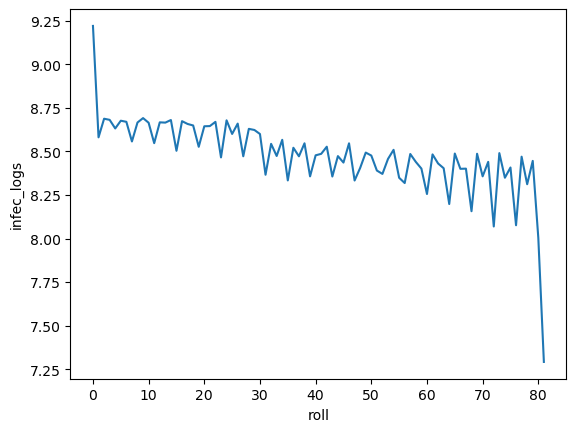

In [12]:
sns.lineplot(data=total_inc_data,x="roll",y="infec_logs")